<center>
<img src="https://raw.githubusercontent.com/FUlyankin/ekenam_grand_research/master/images/cover.png">
</center>


# <center> Иканам гранд рисёрч </center>
## <center>  Часть вторая: визуализируем иканам. Граф иканама. </center> 


Проект **Иканам гранд рисёрч** реализуется [Иканам стьюдентс коммьюнити,](https://vk.com/ikanam)
в частности [вот этим парнем по имени Филипп.](https://vk.com/ppilif)  Если вы нашли ошибку или у вас есть предложения, замечания, деньги, слава или женщины, можно ему написать. Весь говнокод, использованный в исследовании распостраняется по лицензии [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) Его можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу рисёрча.](https://github.com/FUlyankin/ekenam_grand_research) 

## 1. Подготовка

Многие вещи в этом блокноте будут делаться один в один как в [туториале.]( )  В связи с этим, часть пояснений к коду будут опускаться. Чтобы не потерять суть, я советую вам для начала ознакомиться с туториалом. Итак, готовим почву для визуализации иканама. Для этого копируем в этот блокнот строчки, которые уже успели стать классическими. 

In [3]:
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm
import pickle  # Пакет для подгрузки и выгрузки

token= "d897e8ed7ce383a96adeb52b88869a061ffffcf548d69ea2db41f8a6fd182a449ca0f702b6392ee1edde5"
myid = "6045249"


def vk_download(method, parameters, token = token):
    url = 'https://api.vk.com/method/'+method+'?'+parameters+'&access_token='+str(token)
    response = requests.get(url) 
    return(response.json())

vk_download('users.get','user_ids=6045249')

{'response': [{'first_name': 'Филипп',
   'last_name': 'Ульянкин',
   'uid': 6045249}]}

Подгружаем список всех членов иканама. Напомню, что мы в прошлый раз сохранили их в виде словариков: 

```
{id1 : {"name" : "Петров Илья", "sex" : "male", "photo" : ссылка на фоточку}, id2 : ....}

```

По каждому юзеру с помощью метода [`friends.get`](https://vk.com/dev/friends.get) достанем списки из друзей. Дальше для каждого друга будем првоерять, входит ли он в список из иканомчан. Если нет, то мы будем навсегда зыбывать про этого пользователя. Если да, будем запоминать его. На выходе получим словарик вида: 

```
{id1 : [список id друзей с иканама], id2 : [список id друзей с иканама], .... } 

```

In [5]:
# Список юзеров, которые участвуют в исследовании
with open('vk_data/ikanam_info_v18-12-17', 'rb') as f:
    ikanam_info = pickle.load(f)

# Словарик для записи друзей 
ikanam_friends = { }

# Вектор для ошибок 
err_ikanamovec = [ ]

for ikanamovec in tqdm_notebook(ikanam_info.keys()):
    try:
        # Скачиваем друзей текущего иканамовца
        all_friends = vk_download('friends.get','user_id='+str(ikanamovec))['response']
        # Проходимся по всему списку друзей
        cur_friends = [ ]  # сюда закидываем друга, если он с иканама
        for friend in all_friends: 
            if friend in ikanam_info.keys():    # ежели друг с иканама 
                cur_friends.append(friend)  # мы его запоминаем 

        # Закончили проверять друзей
        # Всех иканамовских друзей помещаем в словарик 
        ikanam_friends[ikanamovec] = cur_friends
        time.sleep(0.4)  # На всякий случай, немного спим 
    except:
        # Если возникает ошибка, скорее всего страничка человека удалена
        # Запишем такие странички в отдельный список, а после выбросим их
        print('Проблемы со скачкой', ikanamovec)
        err_ikanamovec.append(ikanamovec)
        
for bad_user in err_ikanamovec:
     del ikanam_friends[bad_user]
        
for key,value in ikanam_friends.items():
    # Фильтруем всех юзеров с удалёнными страницами из друзей каждого человека 
    for bad_user in err_ikanamovec:
        if bad_user in value:
            value.remove(bad_user)

HBox(children=(IntProgress(value=0, max=706), HTML(value='')))

Проблемы со скачкой 422131817
Проблемы со скачкой 333801583
Проблемы со скачкой 5058781
Проблемы со скачкой 137859376
Проблемы со скачкой 27742513
Проблемы со скачкой 123857237
Проблемы со скачкой 172437917
Проблемы со скачкой 247298498
Проблемы со скачкой 224768482
Проблемы со скачкой 63482547
Проблемы со скачкой 5188414
Проблемы со скачкой 73743189
Проблемы со скачкой 297810775
Проблемы со скачкой 62432186
Проблемы со скачкой 31996903
Проблемы со скачкой 104172587
Проблемы со скачкой 72121441
Проблемы со скачкой 374541479
Проблемы со скачкой 65514793
Проблемы со скачкой 233305440
Проблемы со скачкой 8793479
Проблемы со скачкой 92906905
Проблемы со скачкой 1310129
Проблемы со скачкой 179819959
Проблемы со скачкой 4247018
Проблемы со скачкой 71331354
Проблемы со скачкой 387620385
Проблемы со скачкой 20905547
Проблемы со скачкой 60802824
Проблемы со скачкой 3061537
Проблемы со скачкой 287801204
Проблемы со скачкой 293615481
Проблемы со скачкой 109545397
Проблемы со скачкой 378433490



Все предварительные построения для анализа проведены. Дальше перед нами будет стоять две задачи. Первая: погонять по графу иканама разные алгоритмы, созданные для анализа графов, а затем визуализировать всё это добро. Начнём с алгоритмов. 

## 2. NetworkX и граф иканама. 

### 2.1 Убираем лишнее 


В анализе графа нам поможет библиотека `networkx`. Если у вас её нет, наверное, есть смысл её установить. 

``` pip3 install networkx```

В этой библиотеке реализовано довольно [много крутых алгоритмов](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.html) на графах. Более того, по ним сделана довольно красивая [документация.](https://networkx.github.io/documentation/stable/) 

Также мы будем использовать в ходе нашего анализа пакет `nxviz`. В нём есть парочка красвых визуализаций. Его также не помешает установть.

``` pip3 install nxviz```

Итак, создаём граф и рисуем наши первые картинки! 

In [6]:
import networkx as nx             # Пакет для работы с графами
import nxviz as nv                # Немного визуализаций 

import matplotlib.pyplot as plt   # Пакет для визуализации
plt.style.use('ggplot')           # Правильный стиль для отрисовки картинок
%matplotlib inline        

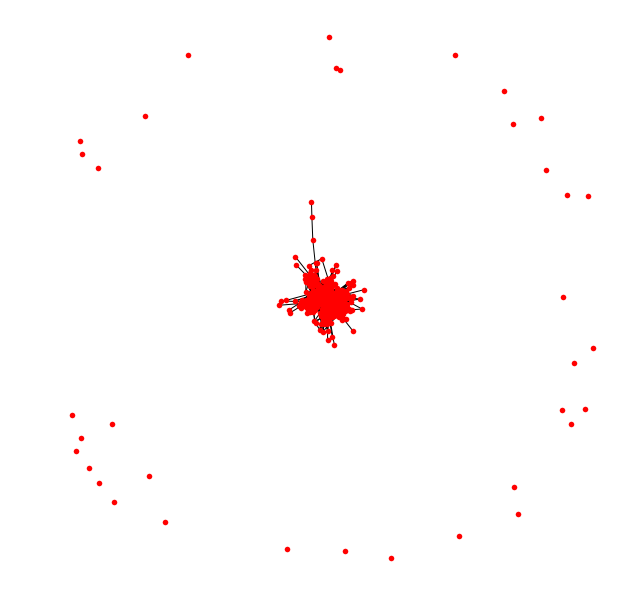

In [12]:
plt.figure(figsize=(8,8))

IG = nx.from_dict_of_lists(ikanam_friends)
nx.draw(IG, node_size=30,  linewidths=0.05, cmap=True)

**Связный граф** — это такой граф, в котором любая пара вершин соединена маршрутом. Наш граф оказался несвязным. В нём куча точек, которые не добавили к себе в друзья... никого. Попробуем понять что это за точки. 

In [19]:
print('Связный граф?', nx.is_connected(IG))

# Вытаскиваем из графа все компоненты связности 
components = list(nx.connected_components(IG))

Связный граф? False


In [37]:
for componenta in components:
    if len(componenta) == 1: 
        cur_uid = list(componenta)[0]
        cur_infa = ikanam_info[cur_uid]
        print(cur_uid, cur_infa['name'])

201445391 Штейнбах Аркадий
74151998 Ященко Светлана
52144231 Камнев Алексей
418461892 Кобыльян Марина
263618776 Еремеева Светлана
4751578 Мирзаянов Ильназ
288420128 Мм Ааа
153344300 Голубева Танюшка
41888120 Дьячков Дима
137320994 Фарвазова Айсылу
318329426 Никулина Ксения
25352831 Полонская Анна
272040580 Каргиева Залина
417784455 Садыков Анна
24466097 Сидорук Дарья
362801918 Кокуева Валентина
34892593 Росляков Роман
221494196 Латыпова Инна
440417314 Семенова Ирина
101211210 Асадова Дарина
354878653 Ле-Ван Елена
340032726 Merkulova Aleksandra
439014638 Зорькина Надежда
418462958 Володина Люда
141077753 Шилов Александр
347168061 Брянцева Мария
422555174 Майданов Евгений
87817792 Моржов Миша
164195993 Kolesnikov Andrey
35886746 Селянина Елизавета
15009561 Сокольников Даниил
237873122 Математика Высшая
340772843 Мостовая Александра
169881598 Милаева Светлана


Большая часть этих точек - это левые аккаунты и боты. Выбросим их все из рассмотрения. Посмотрим сколько в графе кусочков, в которых более одной точки. 

In [54]:
components = list(nx.connected_components(IG))
sg = [comp for comp in list(nx.connected_component_subgraphs(IG)) if len(comp) > 1]
sg

Таких кусков оказывается целых два. В одном из них ровно две вершины. Посмотрим на них. 

In [60]:
[{cur_id : ikanam_info[cur_id]['name']} for cur_id in list(sg[1])]

[{45453859: 'Александрович Slimer'}, {46415087: 'Карпов Александр'}]

Судя по всему, в этой компоненте лежат отец и сын. Этот парень поступил в 2016 году на первый курс магистратуры, потому что так захотели его родители. Через месяц он забрал документы. Выбрасываем его из дальнейшего анализа и переходим к главной компоненте. 

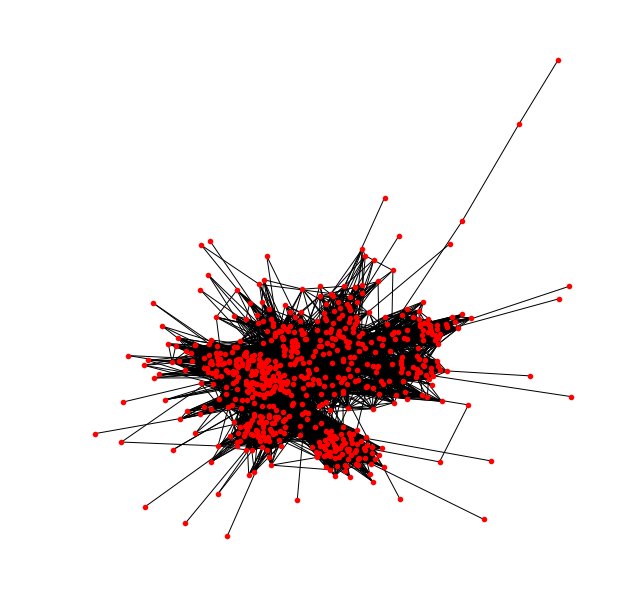

In [62]:
plt.figure(figsize=(8,8))

IG = sg[0]
nx.draw(IG, node_size=30,  linewidths=0.05, cmap=True)

Прошу любить и жаловать! Граф иканама. Именно его мы будем в дальнейшем изучать и украшать. По этому графу можно нарисовать матрицу связности вершин.  Темные точки означают наличие рёбер. 

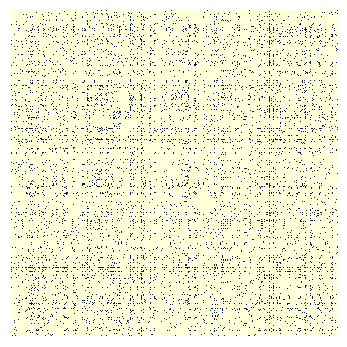

In [125]:
m = nv.MatrixPlot(IG)
m.draw()

### 2.2 Несколько простых вопросов

Пришло время вспомнить курс дискретной математики и второй семестр информатики и как следует поизучать наш свежепостроенный граф. Начнём с простого и понемногу перейдём к сложному. Для начала выясним сколько у него рёбер и вершин.

In [64]:
print('Количество вершин:', IG.number_of_nodes())
print('Количество ребер:', IG.number_of_edges())

Количество вершин: 636
Количество ребер: 11914


Начинаем повторять определения!  **Диаметром графа** называется максимальное расстояние между двумя его его вершинами. Посмотрим какое оно для нашего случая. 

In [65]:
print('Диамерт графа:', nx.diameter(IG))

Диамерт графа: 7


Это означает, что если верить графу друзей, на экономе все друг с другом знакомы через 7 рукопожатий.  Именно так Facebook на основе своих данных [проверил теорию 6 рукопожатий](https://meduza.io/feature/2016/02/04/v-druzyah-u-druga-druga-druga)

**Эксцентриситет вершины графа** —  это расстояние до максимально удаленной от нее вершины. **Радиус графа** — это наименьший из эксцентриситетов всех вершин.

In [67]:
print('Радиус графа:', nx.radius(IG))

Радиус графа: 4


**Центр графа** — это любая вершина, такая, что расстояние от нее до наиболее отдаленной вершины минимально. Центром графа может быть одна вершина или несколько вершин. Или проще. Центр графа — вершина, эксцентриситет (расстояние от этой вершины до самой удаленной от нее) которой равен радиусу. 

Иными словами, в центре графа должны оказаться люди, которые в купе дружат со всеми и поэтому эксцентриситеты их вершин совпадабт с радиусами.

In [68]:
print('Центр графа:', nx.center(IG))

Центр графа: [259700930, 124441034, 73614108, 85937158, 219243643, 91893089]


Центровыми оказались 6 человек. Помотрим на их имена. 

In [70]:
[{user : ikanam_info[user]['name']} for user in nx.center(IG)]

[{259700930: 'Михеева Александра'},
 {124441034: 'Арбатский Никита'},
 {73614108: 'Зарманбетов Ахмед'},
 {85937158: 'Харьковский Максим'},
 {219243643: 'Сакович Дарья'},
 {91893089: 'Васильева Ксения'}]

Откровенно говоря, я ожидал увидеть одним из центровых себя. К сожалению, я довольно плохо общаюсь с новым первым курсом. Скорее всего, это увеличило мой эксцентриситет.

**Коэффициентом кластеризации** называют степень вероятности того, то два разных пользователя, связанные с конкретным, тоже связаны. Этот показатель характеризует то, насколько плотно в графе расположены рёбра. 

In [2]:
print('Коэффициент кластеризации графа:', nx.average_clustering(IG))

NameError: name 'nx' is not defined

Обратите внимание, что в нашем графе максимально может быть $С_{636}^2 = 201930$ рёбер. Внутри графа они могут быть расположены по-разному. Коэффицент кластеризации учитывает то насколько плотно они укомплектовывают граф. 

In [107]:
from math import factorial
NumNod = IG.number_of_nodes()
vertex_max = factorial(NumNod)/(factorial(NumNod - 2)*factorial(2))
print('Максимально возможно вершин:', vertex_max)
print('Доля рёбер в графе:', IG.number_of_edges()/vertex_max)

Максимально возможно вершин: 201930.0
Доля рёбер в графе: 0.059000643787451096


Оформим всё, что было проделано нами выше в отдельную функцию. Чуть ниже мы попробуем повторить всё абсолютно то же самое для более маленьких сообществ людей. 

In [ ]:
def graph_stat(Gr):
    print('Количество вершин:', Gr.number_of_nodes())
    print('Количество ребер:', Gr.number_of_edges())
    print('Диамерт графа:', nx.diameter(Gr))
    print('Радиус графа:', nx.radius(Gr))
    print('Центр графа:', [ikanam_info[user]['name'] for user in nx.center(Gr)])
    print('Коэффициент кластеризации графа:', nx.average_clustering(Gr))
    plt.figure(figsize=(8,8))
    nx.draw(Gr, node_size=30,  linewidths=0.05, cmap=True)
    pass

### 2.3 Авторитетность 

Перейдём к более интересным алгоритмам на графах. Попробуем пронализировать авторитетность иканамовских юзеров. Авторитетность в социальном графе можно анализировать разными способами. Самый простой — отсортировать участников по количеству входящих ребер. У кого больше — тот более авторитетен.

Примерно такой подход используется как один из критериев для ранжирования веб-страниц в поисковике Google. Сам по себе, алгорим носит гордое имя [PageRank.](https://ru.wikipedia.org/wiki/PageRank) Важность страницы, при таком подходе, вычисляется в ходе случайного блуждания по графу, где в качестве вершин рассматриваются страницы, а в качестве рёбер ссылки друг на друга. Если на страницу часто ссылаются другие страницы, значит она более важная. Показатель PageRank при этом будет равен доле пребывания на чьей-то странице в ходе блуждания. Чем дольше мы живём на страничке человека, тем он важнее. 

In [83]:
%%time
pr = nx.pagerank(IG)  # Прогоняем pagerank 
pr_1 = [(ikanam_info[item[0]]['name'],item[1]) for item in pr.items()] # заменям id на имена 
pr_2 = sorted(pr_1, key=lambda w: w[1], reverse=True)  # Сортируем по pagerank

CPU times: user 1.04 s, sys: 25.3 ms, total: 1.06 s
Wall time: 1.07 s


Посмотрим на первую тридцатку авторитетов. Для этого найдём на просторах интернета красивыую функцию для визуализации и немного подредактируем её. Впоследствии мы часто будем пользоваться этой функцией. 

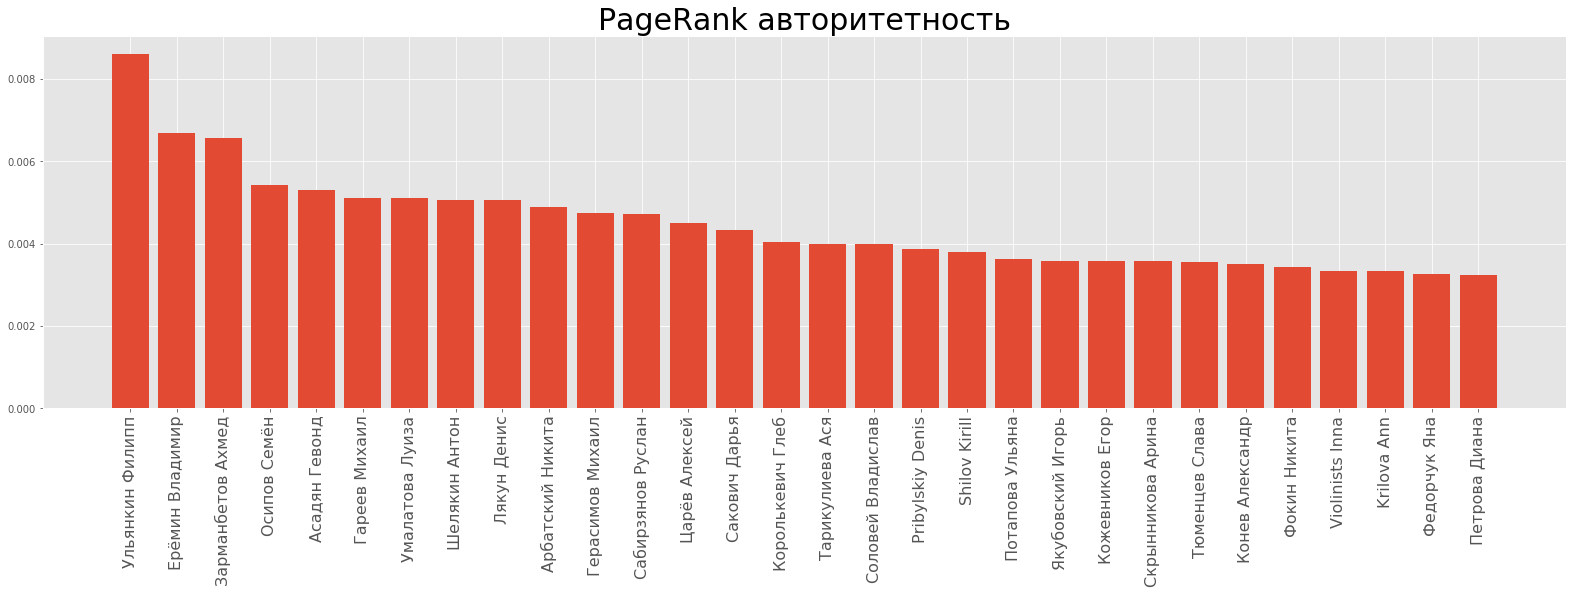

In [99]:
# Функция на вход принимает вектор из пар (имя, значение) и на выход выдаёт картинку
def top_freq_plot(top, title, k=30):

    # Сортируем пары (имя, цифра) по цифрам 
    sorted_word_count = sorted(top, key=lambda w: w[1], reverse=True)     
    
    example_list = sorted_word_count[:k] # Берём первые k человек 
    name = []  
    frequency = []
    for i in range(k):
        name.append(example_list[i][0])      # Вектор из имён 
        frequency.append(example_list[i][1]) # Вектор из циферок 

    indices = np.arange(len(example_list))   # вектор из индексов (числа от 1 до k) 
    
    plt.figure(figsize=(22,8))  # Задаэм размер картинки 
    plt.bar(indices, frequency) # Создаём гистограмму из k столбиков с высотами из вектора frequency
    plt.xticks(indices, name, rotation='vertical',fontsize=16) # Подписываем ось x 
    plt.tight_layout()  # автоматически регулируем размер графика так, чтобы всё влезло  
    plt.title(title, fontsize = 30)  # Делаем заголовок
    pass # чисто формальная команда, которая означает "ничего не делать" она тут вместо return 

top_freq_plot(pr_2, 'PageRank авторитетность')

Обратите внимание, что доля времени, которую мы проводим на странице человека не превышает сотой. В сумме все доли дают единицу. Логично, что при росте количества друзей, доля времени, которую мы будем проводить на странице человека, будет возрастать. Однако, если мы добавляем в друзья более социально впутанного человека, то наш PageRank возрастает сильнее. 

Например, если некоторый первак добавит к себе в друзья Никиту Арбатского, его PageRank увеличится сильнее, чем если он добавит к себе в друзья Никиту Фокина. Добавив в друзья человека, он добавит себя во все маршруты, которые проходят через его друзей. Это позволит увеличить долю пребывания на своей странице пропорционально PageRank добавленного человека. 

Было бы интересно посмотреть на всё то же самое, но сделать граф ориентированным и каждому ребру в качестве веса присвоить количество лайков, которое один человек ставит другому. Мы обязательно займёмся этим немного позже. 

### 2.4 Клика 

Доводилось ли вам когда-нибудь оказаться в клике?  **Кликой** называется такой кусок графа, что все вершины в нём связаны друг с другом. То есть это такой кусок из друзей, в котором все друзья дружат. Интересно было бы найти в нашем графе максимальную клику. То есть максимально большой полный подграф нашего графа. 

Найти все клике в графе помогает функуция `find_cliques`. Она на выход выдаёт вектор из клик. 

In [132]:
# Нашили вектор из клик 
cliqa = list(nx.find_cliques(IG))

# Выяснили какая клика обладает максимальным размером 
cl_len = [len(item) for item in cliqa]
print('Размер максимальной клики:', max(cl_len))

Размер максимальной клики: 23


Хотелось бы уметь находить внутри этого вектора все клики фиксированной длины. Напишем для этого функцию. 

In [129]:
def maximal_cliques(G, size):
    
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [133]:
print('Количество клик максимального размера:', len(maximal_cliques(IG, 23)))

Количество клик максимального размера: 3


Выведем всех членов этих трёх клик на экран! 

In [134]:
for clq in maximal_cliques(IG, 23):
    print([ikanam_info[user]['name'] for user in clq], '\n')

['Васильева Александра', 'Полякова Полина', 'Федорчук Яна', 'Зарманбетов Ахмед', 'Гареев Михаил', 'Ерёмин Владимир', 'Лякун Денис', 'Канцевич Дарья', 'Бекирова Ольга', 'Распутняя Альбина', 'Найденович Анна', 'Шербустанова Мария', 'Петров Илья', 'Арбатский Никита', 'Алексеева Дашка', 'Яковлева Елизавета', 'Кузнецова Лиза', 'Левит Виктория', 'Свистельникова Татьяна', 'Чекалова Анастасия', 'Кулак Ксения', 'Колотовкина Анастасия', 'Гарганова Елизавета'] 

['Козлова Маша', 'Федорчук Яна', 'Зарманбетов Ахмед', 'Ерёмин Владимир', 'Полякова Полина', 'Лякун Денис', 'Петров Илья', 'Чупругин Данил', 'Гареев Михаил', 'Шербустанова Мария', 'Канцевич Дарья', 'Кузнецова Лиза', 'Яковлева Елизавета', 'Арбатский Никита', 'Свистельникова Татьяна', 'Найденович Анна', 'Бекирова Ольга', 'Распутняя Альбина', 'Кулак Ксения', 'Гарганова Елизавета', 'Колотовкина Анастасия', 'Левит Виктория', 'Алексеева Дашка'] 

['Алексеева Дашка', 'Зарманбетов Ахмед', 'Ерёмин Владимир', 'Петров Илья', 'Федорчук Яна', 'Полякова

Все три клики относятся к набору 2015 года. Посмотрим на каких людей эти клики отличаются между собой. 

In [149]:
sets = [ ]    # Сюда поместим все три множества по отдельности 

for clq in maximal_cliques(IG, 23):
    sets.append(set([ikanam_info[user]['name'] for user in clq]))
    
# Выделим пересечение всех трёх множеств. 
# Внутри пересечения все дружат со всеми. Удалим его. 

intersection = sets[0] & sets[1] & sets[2]
print(sets[0] - intersection)
print(sets[1] - intersection)
print(sets[2] - intersection)

{'Васильева Александра', 'Чекалова Анастасия'}
{'Козлова Маша', 'Чупругин Данил'}
{'Чекалова Анастасия', 'Чупругин Данил'}


Настя друит с Сашей. Маша дружит с Даней, Даня дружит с Настей. Но вот беда! Настя не дружит с Машей, а Даня не дружит с Сашей. Из-за этого мы имеем три клики из 23 человек, а не одну большую из 24. Кому-то нужно срочно подружиться :) 

Окей! Мы посмотрели на примере нашего графа несколько довольно интересных вещей. Попробуем опуститься на уровень более мелких сообществ, например курсов, и проанализировать что происходит у них. 

## 3. Субграфы иканама 

Подгрузим табличку, в которой отмечено какой id относится к какому курсу. 

In [ ]:
pd.read_csv('')

In [ ]:
!ls

## Почиташки и авторские права 

При написании раздела про анализ графа использовался код, а также кусочки из [этой статейки с Хабра](https://habrahabr.ru/post/243229/) 

<img align="center" src="https://raw.githubusercontent.com/FUlyankin/vk_grand_research/master/images/cats.jpg" height="1200" width="1200"> 